# Load the data from the csv file and clean it if necessary.


In [ ]:
#importing important libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#loading and reading the data from CSV
from google.colab import files
uploaded = files.upload()

#reading the data file using pandas framework
df = pd.read_csv("Mall_Customers.csv")
df.info()

Saving Mall_Customers.csv to Mall_Customers.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


For Cleaning part, checking the null/unique values 

In [ ]:
#Checking for null values in columns
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#checking unique values for each column to identify whether there is any unnecessary values or not
print(df['CustomerID'].unique())
print('------------------------------')
print(df['Gender'].unique())
print('------------------------------')
print(df['Age'].unique())
print('------------------------------')
print(df['Annual Income (k$)'].unique())
print('------------------------------')
print(df['Spending Score (1-100)'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
------------------------------
['Male' 'Female']
------------------------------
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 

**Answer for the Cleaning part**: Data seems cleaned and does not need any changes.

#Visualization

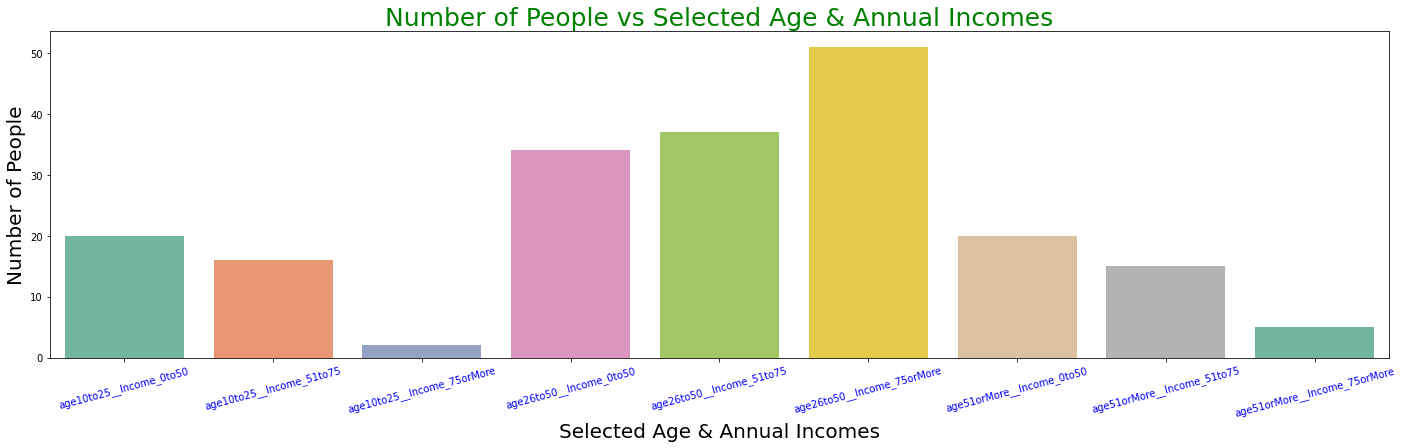

In [ ]:
age10to25__Income_0to50 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 50) & (df.Age <= 25) & (df.Age >= 10)]
age10to25__Income_51to75 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 75) & (df.Age <= 25) & (df.Age >= 10)]
age10to25__Income_75orMore = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 76) & (df.Age <= 25) & (df.Age >= 10)]

age26to50__Income_0to50  = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 50) & (df.Age <= 50) & (df.Age >= 26)]
age26to50__Income_51to75  = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 75) & (df.Age <= 50) & (df.Age >= 26)]
age26to50__Income_75orMore = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 76) & (df.Age <= 50) & (df.Age >= 26)]

age51orMore__Income_0to50  = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 50) & (df.Age >= 51)]
age51orMore__Income_51to75  = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 51) & (df["Annual Income (k$)"] <= 75) & (df.Age >= 51)]
age51orMore__Income_75orMore= df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 76) & (df.Age >= 51)]

aix = ["age10to25__Income_0to50", "age10to25__Income_51to75", "age10to25__Income_75orMore", 
       "age26to50__Income_0to50", "age26to50__Income_51to75", "age26to50__Income_75orMore", 
       "age51orMore__Income_0to50", "age51orMore__Income_51to75", "age51orMore__Income_75orMore"]
aiy = [len(age10to25__Income_0to50.values), len(age10to25__Income_51to75.values), len(age10to25__Income_75orMore.values), 
       len(age26to50__Income_0to50.values), len(age26to50__Income_51to75.values), len(age26to50__Income_75orMore.values), 
       len(age51orMore__Income_0to50.values), len(age51orMore__Income_51to75.values), len(age51orMore__Income_75orMore.values)]

plt.figure(figsize=(24,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.xticks(rotation=15, c='b')
plt.title("Number of People vs Selected Age & Annual Incomes", c= 'g', size = 25)
plt.xlabel("Selected Age & Annual Incomes", size = 20)
plt.ylabel("Number of People", size = 20)
plt.show()

Text(0.5, 1.0, 'Age vs Annual Income (k$)')

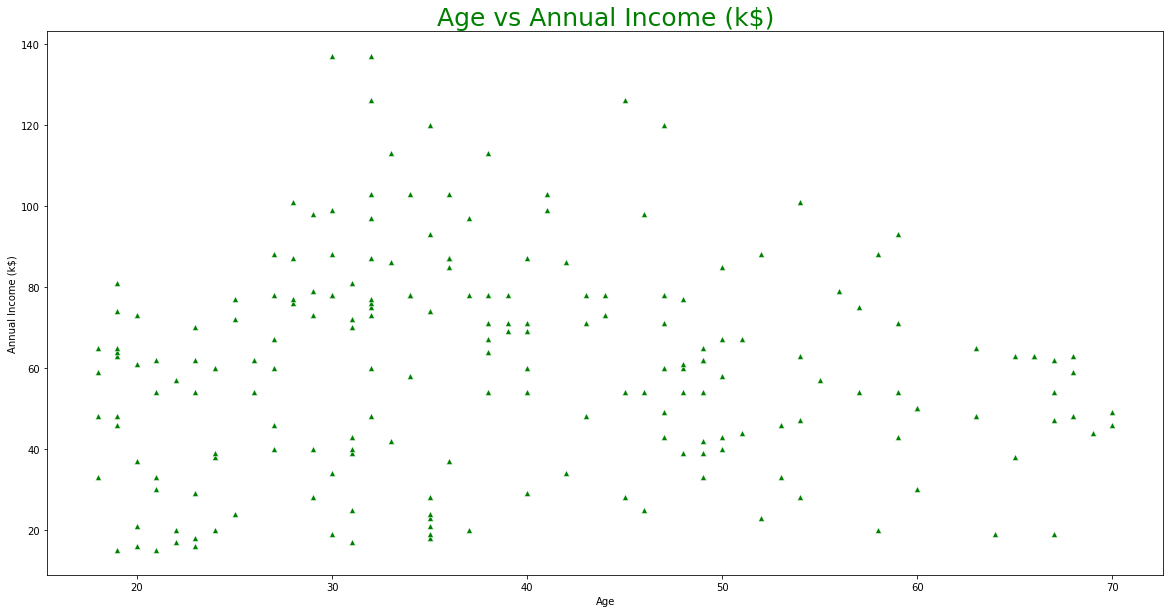

In [ ]:
# I am using scatter plot from seaborn library to display if there any cluster of Age and Annual income group.
plt.figure(figsize=(20, 10))
sns.scatterplot(x ='Age', y = 'Annual Income (k$)', data= df, marker= '^', color='g')
plt.title('Age vs Annual Income (k$)', size = 25, color='green')

**Answer:** From above scatter plot graph it is very hard to decide the clusters for Age and Annual Income group. However, visually, it can be seen clusters of 3 or 4 or may be 5 as per the density of the data points. But we cannot decide exact number of clusters with higher accuracy.

# Random numbers of cluster

In [ ]:
# As age and annual income has different ranges, firstly, I am scalling both columns so alghorithm does not weigh on one parameter. 
# scalling the values for Age and Annual Income columns.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for variable in ['Age', 'Annual Income (k$)']:
    scaled = '1scaled_' + variable
    new_c = scaler.fit(df[variable].values.reshape(-1,1))
    df[scaled] = new_c.transform(df[variable].values.reshape(-1,1))

#making new dataframe with scaled age and scaled income
d1 = df[['1scaled_Age', '1scaled_Annual Income (k$)']].values

In [ ]:
#Importing KMeans algorithm for cluster form sklearn library
from sklearn.cluster import KMeans
from sklearn import metrics

def KMeans_Algorithm(dataset, n):
    KMeans_cluster = KMeans(n_clusters= n,init='k-means++', max_iter=350, random_state=0, algorithm = "elkan")
    KMeans_cluster.fit(dataset)
    
#for centroid making new dataframe
    centroid  = KMeans_cluster.cluster_centers_
    
#adding label for clusters
    label_cluster = KMeans_cluster.labels_
    df["Clusters_Q1"] = label_cluster
    return label_cluster, centroid

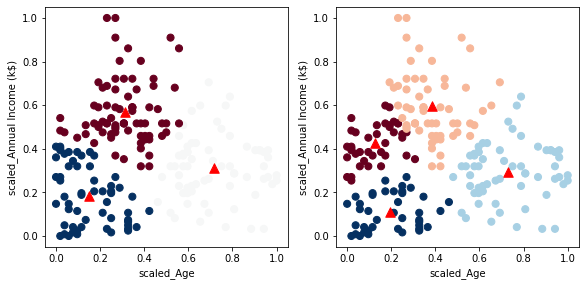

In [ ]:
#creating clusters for age and annual income for value of cluster(k) of 3 and 4
#from Q1.2 scatter plot, it is very hard to decide the number of clusters. However, I am running algorithm for 3 and 4 clusters.

fig1 = plt.figure(figsize=(20,15))
for x in range (3,5):
    d1_label_cluster, d1_centroid = KMeans_Algorithm(d1, x)
    centroid_df = pd.DataFrame(d1_centroid, columns =['X', 'Y'])
  
    sub = fig1.add_subplot(340 + x - 1)
    sub.scatter(df["1scaled_Age"], df["1scaled_Annual Income (k$)"], s = 50, c = df["Clusters_Q1"], cmap = "RdBu")
    sub.scatter(centroid_df['X'], centroid_df['Y'], s = 90, marker= "^", color = "r")
    sub.set_xlabel("scaled_Age")
    sub.set_ylabel("scaled_Annual Income (k$)")

#**Elbow Method**

In this method, WCSS (Within cluster sum of squared errors) are calculated for given numbers of clusters. By using the graph for WCSS vs Cluster values, we can choose the optimum number of cluster where graph bend (like elbow) in the plot and there is very less changes further values. 

In other words we can say that optimum number for cluster is the elbow joint point of the graph from where WCSS values are stopped to reduce in large margin. From below graph we can visually see that at k=3, graph is bending and WCSS values are stopped decreasing in very large margin **so, here optimum numbers of cluster is selected to 3.**

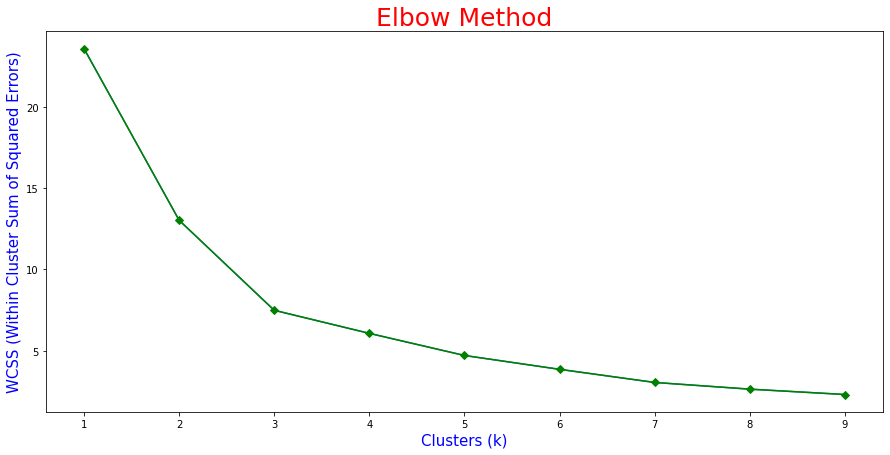

In [ ]:
#for WCSS (Within cluster sum of squared errors) Value
WCSS_VALUE=[]

# I am performing elbow method for cluster(k) value of between 1 to 9.
for x in range(1,10):
    K_MeanEL=KMeans(n_clusters=x)
    K_MeanEL.fit(d1)
    WCSS_VALUE.append(K_MeanEL.inertia_)

# for elbow method graph
plt.figure(figsize=(15,7))
plt.plot(range(1,10),WCSS_VALUE)
plt.plot(range(1,10),WCSS_VALUE, linewidth=1.5, color="green", marker ="D")

plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS (Within Cluster Sum of Squared Errors)", size = 15, c = 'b')
plt.xlabel("Clusters (k)", size = 15, c = 'b')
plt.title("Elbow Method", size = 25, c = 'r')
plt.show()

# Choosing Optimum Number
**Optimum number of Clusters = 3**. In Elbow method, WCSS (Within cluster sum of squared errors) are calculated for given numbers of clusters. By using the graph for WCSS vs Cluster values, we can choose the optimum number of cluster where graph bend (like elbow) in the plot and there is very less changes further values.
from above graph we can visually see that at k=3, graph is bending and WCSS values from 3 are stopped decreasing in very large margin so, here final value of cluster is 3.

Text(0.5, 1.0, 'Clusters for Age vs Annual Income(k$)')

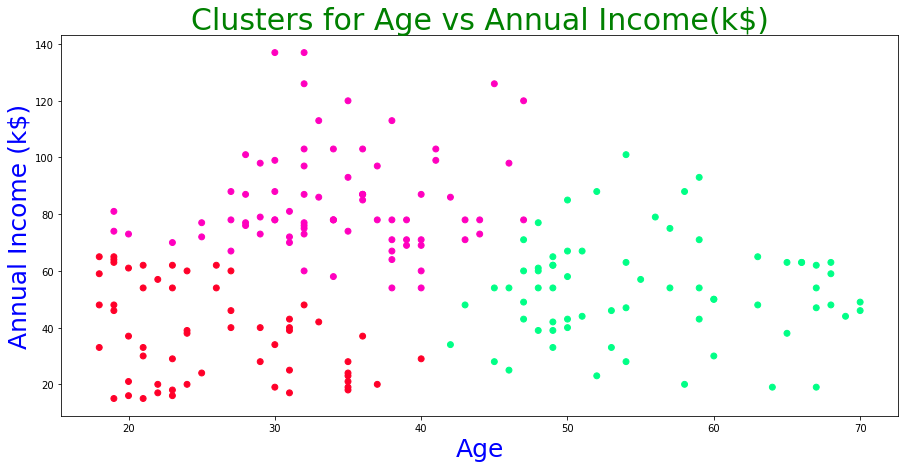

In [ ]:
#from above graph we can visually see that at k=3, graph is bending and WCSS values from 3 are stopped decreasing in very large margin.
#from the above elbow method graph, optimum number of k is 3 so, here final value of cluster is 3.
d1_label_cluster, d1_centroid  = KMeans_Algorithm(d1, 3)
plt.figure(figsize = (15,7))
plt.scatter(df["Age"], df["Annual Income (k$)"], s = 35, c = df["Clusters_Q1"], cmap = "gist_rainbow_r")
plt.xlabel("Age", size = 25, c = 'b')
plt.ylabel("Annual Income (k$)", size = 25, c = 'b')
plt.title("Clusters for Age vs Annual Income(k$)", size = 30, c = 'g')



Text(0.5, 1.0, 'Clusters for scaled_Age vs scaled_Annual Income(k$) - with Centroids')

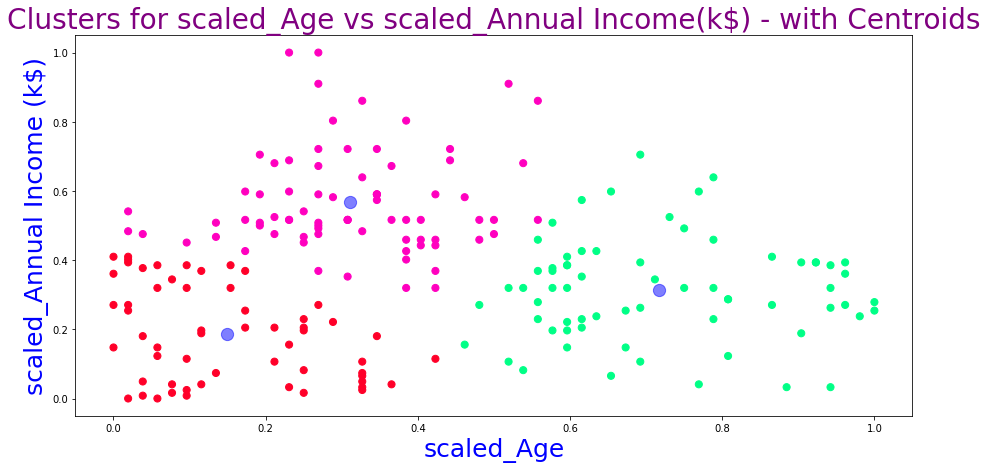

In [ ]:
######################################################################### Extra part #####################################################################
                                                          #(for visualiaztion of centroids with clusters) 
                            # for centroids we are making plot from scalled values. Here is the plot for clusters and their centroids.
from sklearn.cluster import KMeans
plt.figure(figsize = (15,7))
K_Means2 = KMeans(n_clusters=3, random_state=0)
K_Means2.fit(d1)
predict_cluster = K_Means2.predict(d1)
plt.scatter(df['1scaled_Age'], df['1scaled_Annual Income (k$)'], c=predict_cluster, s=50, cmap="gist_rainbow_r")
centers = K_Means2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='b',s=150, alpha=0.5)
plt.xlabel("scaled_Age", size = 25, c = 'b')
plt.ylabel("scaled_Annual Income (k$)", size = 25, c = 'b')
plt.title("Clusters for scaled_Age vs scaled_Annual Income(k$) - with Centroids", size = 28, c = 'purple')


#Adding feature to dataframe

In [ ]:
#assigning catergories to the clusters and making new category column.
Cluster_category = df['Clusters_Q1']
Cluster_mapping = {0:'YoungMidAge-MidHighIncome', 1:'MidOldAge_lowMidIncome', 2:'YoungMidAge_lowMidIncome'}
Cluster_category = [Cluster_mapping[i] for i in Cluster_category]
df['CategoriesQ1'] = pd.Series(Cluster_category, index=df.index)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),1scaled_Age,1scaled_Annual Income (k$),Clusters_Q1,CategoriesQ1
0,1,Male,19,15,39,0.019231,0.000000,2,YoungMidAge_lowMidIncome
1,2,Male,21,15,81,0.057692,0.000000,2,YoungMidAge_lowMidIncome
2,3,Female,20,16,6,0.038462,0.008197,2,YoungMidAge_lowMidIncome
3,4,Female,23,16,77,0.096154,0.008197,2,YoungMidAge_lowMidIncome
4,5,Female,31,17,40,0.250000,0.016393,2,YoungMidAge_lowMidIncome
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.326923,0.860656,0,YoungMidAge-MidHighIncome
196,197,Female,45,126,28,0.519231,0.909836,0,YoungMidAge-MidHighIncome
197,198,Male,32,126,74,0.269231,0.909836,0,YoungMidAge-MidHighIncome
198,199,Male,32,137,18,0.269231,1.000000,0,YoungMidAge-MidHighIncome


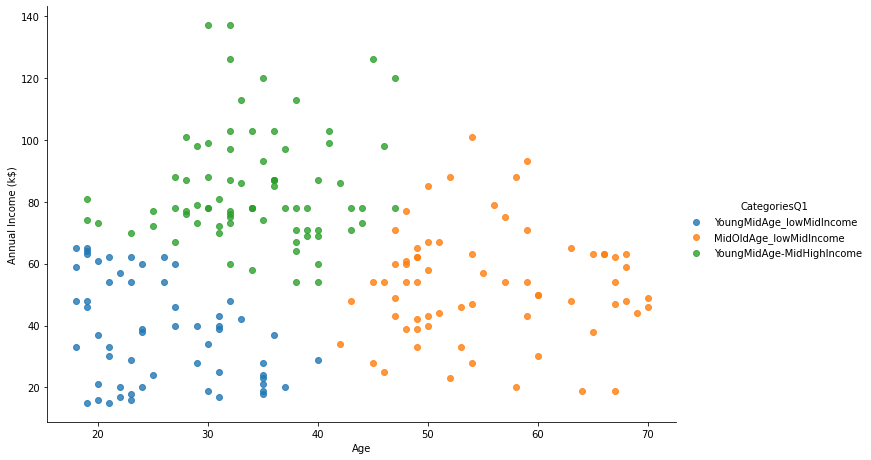

In [ ]:
facet = sns.lmplot(data=df, x='Age', y='Annual Income (k$)', hue='CategoriesQ1', fit_reg=False, height=6.5, aspect=1.5)

Answer: As per above graph I make 3 categories for clusters:

**Cluster 0:	YoungMidAge-MidHighIncome**	

**Cluster 1:  MidOldAge_lowMidIncome**

**Cluster 2:  YoungMidAge_lowMidIncome**


#Making cluster for Category of q1 vs spending score
Display the data as a graph of your choice where it will be possible to visually see if there is any clusters of categories of Q1 vs spending score.

Text(0.5, 1.0, 'Clusters From Q1 vs Spending Score (1-100)')

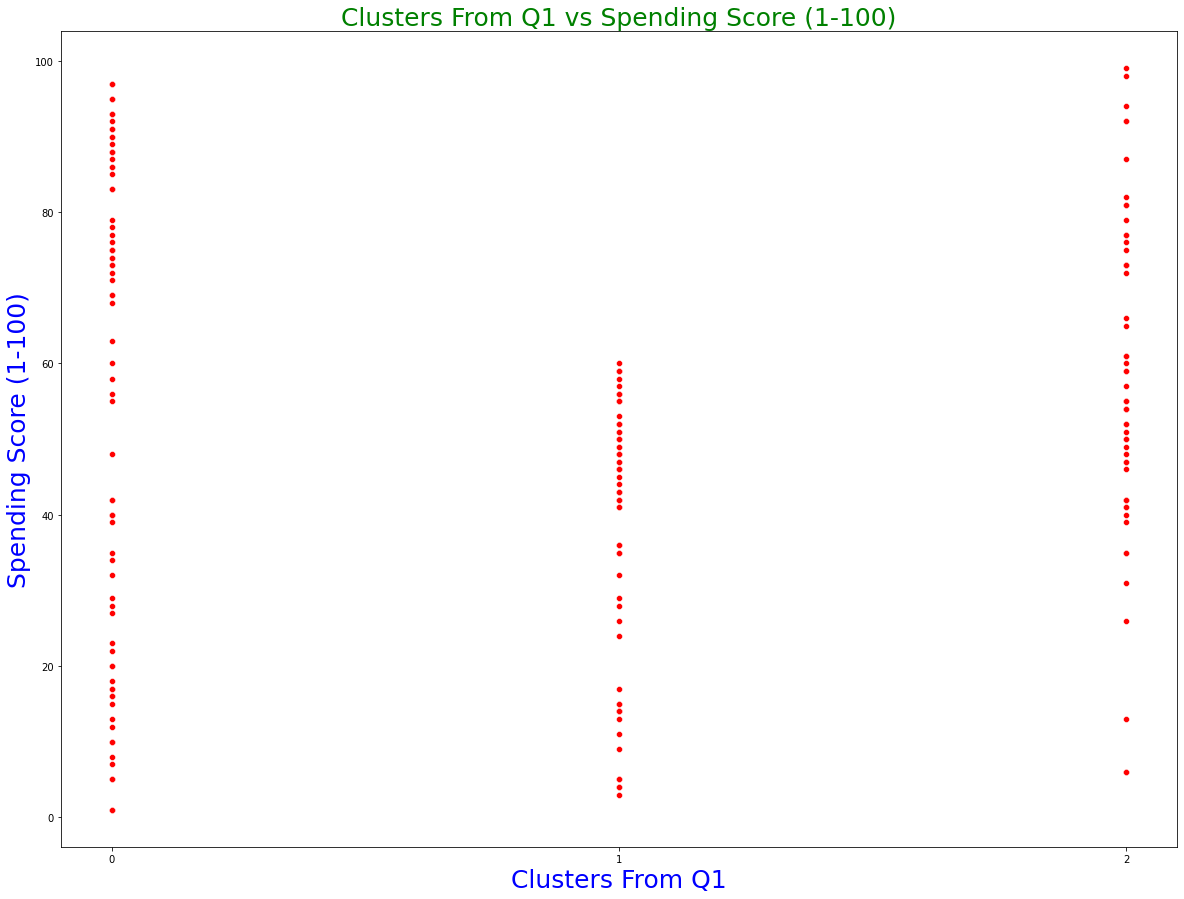

In [ ]:
#using scatter plot from Seaborn library we can visualize Q1 Categories and Spending score. 
plt.figure(figsize=(20, 15))
sns.scatterplot(x ='Clusters_Q1', y = 'Spending Score (1-100)', data= df, marker= 'o', color='r')
plt.xticks(np.arange(0,3,1))
plt.xlabel("Clusters From Q1", size = 25, c = 'b')
plt.ylabel("Spending Score (1-100)", size = 25, c = 'b')
plt.title('Clusters From Q1 vs Spending Score (1-100)', size = 25, color='green')

#from below graph, we can visually see that we can make 3 clusters for catergory of Q1 and Spending score.


From above graph, we can visually see that we can make 3 clusters for catergory of Q1 and Spending score. However, there are more categorised clusters are also possible

# **Silhouett Method**
By using Silhouett Coefficient we can know that whether data-point are correctly categoriesed to their cluster or not. If Silhouette Coeffiecient closer to 1 then we can say that data points are correctly  allocated to the right clusters. To choose the optimum number of cluster, we are picking cluster who has maximum Silhouette Score.
As per below Silhouett Method plot, it is clear that we are getting maximum silhouette score for cluster(k) = 6. **Therefore, I am selecting 6 clusters as optimum number.**

In [ ]:
#Here, I am doing scalling for both parameters as there is very large margin in both parameters values
#scalling the required columns for Q1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for variable in ['Spending Score (1-100)', 'Clusters_Q1']:
    scaled = '1scaled_' + variable
    new_c = scaler.fit(df[variable].values.reshape(-1,1))
    df[scaled] = new_c.transform(df[variable].values.reshape(-1,1))
# Making new DF For scaled old Clusters and scaled Spending score
d2 = df[['1scaled_Clusters_Q1', '1scaled_Spending Score (1-100)']]

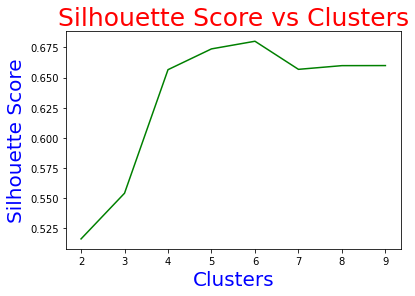

In [ ]:
# Here, I am using silhouette method to choose optimum value of cluster
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]

#here I am applying silhouette method for clusters of 2 to 9.
for i in range(2,10):
     kmeans_k = KMeans(n_clusters=i)     
     kmeans_k.fit(d2)
     k_score = silhouette_score(d2, kmeans_k.labels_)
     silhouette_coefficients.append(k_score)
     plt.ylabel("Silhouette Score", size = 20, c = 'b')
     plt.xlabel("Clusters", size = 20, c = 'b')
     plt.title("Silhouette Score vs Clusters", size = 25, c = 'r')
sns.lineplot(x=range(2,10),y=silhouette_coefficients,color="green")
#as per below graph we getting maximum Silhouette score for clusters of 6.

In [ ]:
# As per above plot, it is clear that we are getting maximum silhouette score for cluster(k) = 6 value.
# Therefore, here is the codes for exact silhouette score for value of cluster(k) = 6. 
from sklearn.metrics import silhouette_samples, silhouette_score
K_Means2= KMeans(n_clusters=6)
K_Means2.fit(d2)
value2=K_Means2.predict(d2)
print("For 6 clusters (Optimum Number), Silhouette Score is",round(silhouette_score(d2, value2),3), end='.')

For 6 clusters (Optimum Number), Silhouette Score is 0.68.

**Answer**:  Optimum number of Clusters = 6

# Run clustering with chosen Optimum number

Text(0.5, 1.0, 'Old clusters category vs Spending Score (1-100)')

<Figure size 864x720 with 0 Axes>

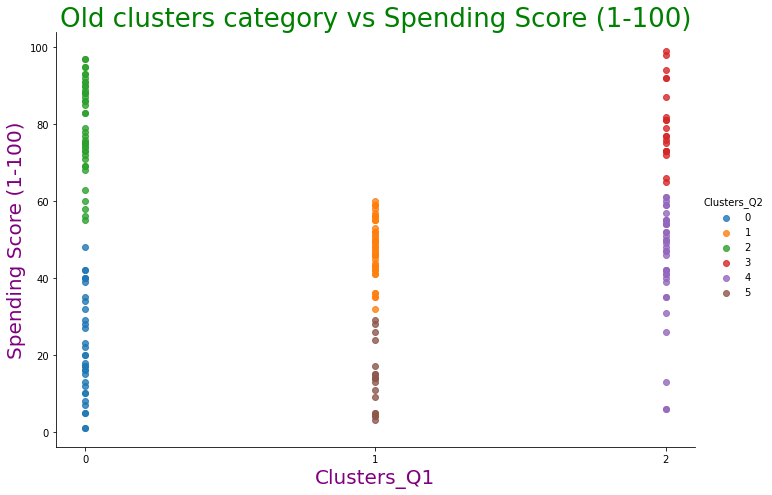

In [ ]:
#from silhouette score, optimum number of k is 6 so, here final value of cluster is 6.
from sklearn.cluster import KMeans
plt.figure(figsize = (12,10))

K_MeansQ2 = KMeans(n_clusters=6, random_state=0)
K_MeansQ2.fit(d2)
predict_cluster2 = K_MeansQ2.predict(d2)

#for adding new column for assigned clustes
df['Clusters_Q2'] = pd.Series(predict_cluster2, index=df.index)

#plotting the clusters
#plt.scatter(x ='Clusters_Q1', y = 'Spending Score (1-100)', c=predict_cluster2, data = df, s=32, cmap='gist_rainbow_r')
facet = sns.lmplot(data=df, x='Clusters_Q1', y='Spending Score (1-100)', hue='Clusters_Q2', height=6.5, aspect=1.5)

plt.xticks(np.arange(0,3,1))
plt.xlabel("Clusters_Q1", size = 20, color='purple')
plt.ylabel("Spending Score (1-100)", size = 20, color='purple')
plt.title("Old clusters category vs Spending Score (1-100)", size = 26, color='g')

Text(0.5, 1.0, 'scaled_cluster of Q1 vs scaled_Spending Score - with Centroids')

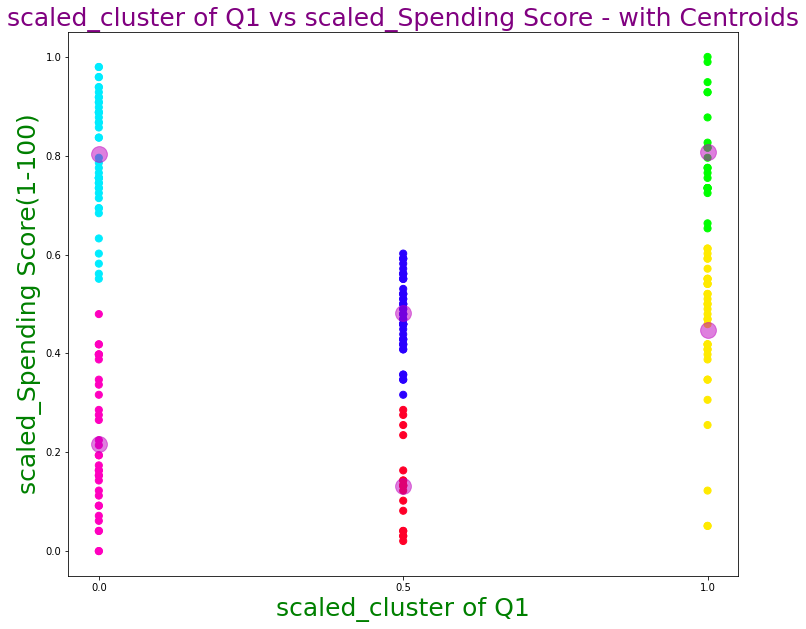

In [ ]:
############################################################### Extra (clusters with centroids) #########################################################################
###################################################### BY Using Sklearn library performing KMeans algorithm #############################################################
from sklearn.cluster import KMeans
plt.figure(figsize = (12,10))

kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(d2)
y_kmeans2 = kmeans.predict(d2)

# plot clusters
plt.scatter(df['1scaled_Clusters_Q1'], df['1scaled_Spending Score (1-100)'], c=y_kmeans2, s=50, cmap='gist_rainbow_r')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='m',s=250, alpha=0.5)
plt.xticks(np.arange(0,1.5,0.5))
plt.xlabel("scaled_cluster of Q1", size = 25, c = 'g')
plt.ylabel("scaled_Spending Score(1-100)", size = 25, c = 'g')
plt.title("scaled_cluster of Q1 vs scaled_Spending Score - with Centroids", size = 25, c = 'purple')

# Deciding name of category and adding in the data frame

In [ ]:
###############################################################################################################################################################################################       
             #  colour   oldcluster   spending score   
#cluster 0:     Pink        0               1-48
#cluster 1:    DarkBLUE     1              32-60
#cluster 2:    Skyblue      0              55-97
#cluster 3:     Green       2              65-99
#cluster 4:    Yellow       2               6-61
#cluster 5:     Red         1               3-29
###############################################################################################################################################################################################

Cluster_category2 = df['Clusters_Q2']
#as per above table, I am making category as per spending score and old cluster
# for example, for new cluster 0 have Q1_cluster0 and spending score (1-48). So, I am naming that cluster as "oldcluster0_score1_48"

Cluster_mapping2 = {0:'oldcluster0_score1_48', 1:'oldcluster1_score32_60', 3:'oldcluster2_score65_99', 2:'oldcluster0_score55_97', 5:'oldcluster1_score3_29', 4:'oldcluster2_score6_61'}
Cluster_category2 = [Cluster_mapping2[X] for X in Cluster_category2]
df['CategoriesQ2'] = pd.Series(Cluster_category2, index=df.index)
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),1scaled_Age,1scaled_Annual Income (k$),Clusters_Q1,CategoriesQ1,1scaled_Spending Score (1-100),1scaled_Clusters_Q1,Clusters_Q2,CategoriesQ2
0,1,Male,19,15,39,0.019231,0.000000,2,YoungMidAge_lowMidIncome,0.387755,1.0,4,oldcluster2_score6_61
1,2,Male,21,15,81,0.057692,0.000000,2,YoungMidAge_lowMidIncome,0.816327,1.0,3,oldcluster2_score65_99
2,3,Female,20,16,6,0.038462,0.008197,2,YoungMidAge_lowMidIncome,0.051020,1.0,4,oldcluster2_score6_61
3,4,Female,23,16,77,0.096154,0.008197,2,YoungMidAge_lowMidIncome,0.775510,1.0,3,oldcluster2_score65_99
4,5,Female,31,17,40,0.250000,0.016393,2,YoungMidAge_lowMidIncome,0.397959,1.0,4,oldcluster2_score6_61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.326923,0.860656,0,YoungMidAge-MidHighIncome,0.795918,0.0,2,oldcluster0_score55_97
196,197,Female,45,126,28,0.519231,0.909836,0,YoungMidAge-MidHighIncome,0.275510,0.0,0,oldcluster0_score1_48
197,198,Male,32,126,74,0.269231,0.909836,0,YoungMidAge-MidHighIncome,0.744898,0.0,2,oldcluster0_score55_97
198,199,Male,32,137,18,0.269231,1.000000,0,YoungMidAge-MidHighIncome,0.173469,0.0,0,oldcluster0_score1_48


**Answer:**

____________  #**Clusters**#______|______##**Name of the Cluster**##
1.  Cluster
0: -----> 'oldcluster0_score1_48'
2.   Cluster
1: ----->  'oldcluster1_score32_60' 
3.   Cluster
2: ----->  'oldcluster0_score55_97'
4.   Cluster
3: ----->  'oldcluster2_score65_99'
5.   Cluster
4: ----->  'oldcluster2_score6_61'
6.   Cluster
5: ----->  'oldcluster1_score3_29'






# Histogram


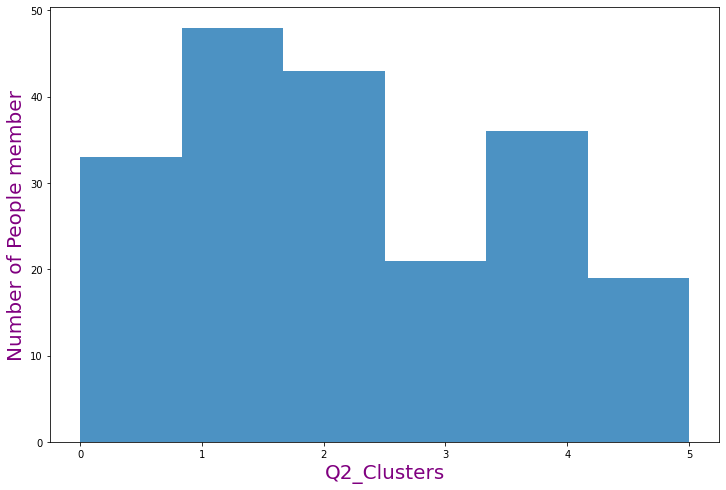

In [ ]:
plt.figure(figsize=(12,8))
df.Clusters_Q2.plot.hist(bins=6,alpha=.8)
plt.ylabel("Number of People member", size = 20, c = 'purple')
plt.xlabel("Q2_Clusters", size = 20, c = 'purple')
plt.show()

                #Number of Members   Deatails of Cluster
#CLUSTER 0  ->      33               Q1_cluster_Category:0 and spending_score:  1 to 48  
#CLUSTER 1  ->      48               Q1_cluster_Category:1 and spending_score: 32 to 60
#CLUSTER 2  ->      43               Q1_cluster_Category:0 and spending_score: 55 to 97
#CLUSTER 3  ->      21               Q1_cluster_Category:2 and spending_score: 65 to 99
#CLUSTER 4  ->      36               Q1_cluster_Category:2 and spending_score:  6 to 61
#CLUSTER 5  ->      19               Q1_cluster_Category:1 and spending_score:  3 to 29

#References:

[1]	M. Waskom, “seaborn: statistical data visualization,” J. Open Source Softw., vol. 6, no. 60, p. 3021, Apr. 2021, doi: 10.21105/joss.03021.

[2]	“pandas - Python Data Analysis Library.” https://pandas.pydata.org/ (accessed Mar. 20, 2022).

[3]	“Matplotlib — Visualization with Python.” https://matplotlib.org/ (accessed Mar. 20, 2022).

[4]	“Mall Customer Segmentation Data.” https://kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python (accessed Mar. 20, 2022).

[5]	D. Gong, “Clustering Algorithm for Customer Segmentation,” Medium, Aug. 16, 2021. https://towardsdatascience.com/clustering-algorithm-for-customer-segmentation-e2d79e28cbc3 (accessed Mar. 20, 2022).

[6]	I. D. Baruah, “Cheat sheet for implementing 7 methods for selecting the optimal number of clusters in Python,” Medium, Jul. 21, 2021. https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad (accessed Mar. 20, 2022).

[7]	“sklearn.cluster.KMeans,” scikit-learn. https://scikit-learn/stable/modules/generated/sklearn.cluster.KMeans.html (accessed Mar. 20, 2022).

[8]	“scikit-learn: machine learning in Python — scikit-learn 1.0.2 documentation.” https://scikit-learn.org/stable/ (accessed Mar. 20, 2022).

[9]	“python - How to correctly translate Kmeans labels to category labels - Stack Overflow.” https://stackoverflow.com/questions/50889623/how-to-correctly-translate-kmeans-labels-to-category-labels (accessed Mar. 20, 2022).


